# Online Payment Fraud Detection

In [2]:
pwd

'C:\\Users\\enidi\\Documents\\10Alytics Data analytics\\my project'

In [3]:
#import python libraries for data manipulation and visualization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import norm
import statistics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
# load the data with pandas dataframe

bank_data = pd.read_csv(r"C:\Users\enidi\Documents\10Alytics Data analytics\my project\Online Payment Fraud Detection.csv")

In [5]:
bank_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [6]:
bank_data.shape

(1048575, 10)

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
bank_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
# Check the Descriptive Statistics
bank_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


<AxesSubplot:>

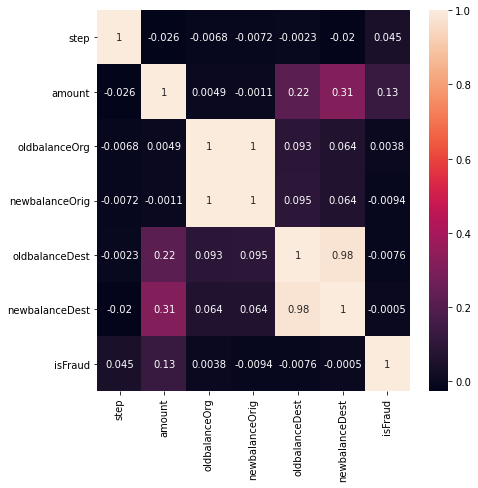

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(bank_data.corr(), annot=True)

In [11]:
# Making sense of Target column 'isFraud'
# Write a function that labels 'isFraud' column properly to 'IS FRAUD' and 'IS NOT FRAUD'

def isFraud(z):
    if z == 0:
        return 'IS NOT FRAUD'
    else:
        return 'IS FRAUD'
    
bank_data['isFraud'] = bank_data['isFraud'].apply(isFraud)
bank_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,IS NOT FRAUD
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,IS NOT FRAUD
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,IS FRAUD
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,IS FRAUD
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,IS NOT FRAUD
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,IS NOT FRAUD
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,IS NOT FRAUD
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,IS NOT FRAUD
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,IS NOT FRAUD


In [12]:
###DATA VISUALIZATION
# Activate seaborn properties for charts/graphs
sns.set()

<AxesSubplot:>

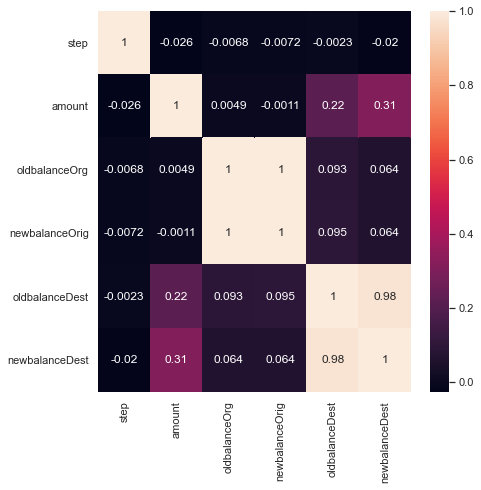

In [13]:
# Display Data set heatmap

plt.figure(figsize=(7,7))
sns.heatmap(bank_data.corr(), annot=True)

In [14]:
# Distribution of Target variable 'isFraud'
isFraud_percentage = (bank_data['isFraud'].value_counts()/bank_data.shape[0]*100).round(2)
isFraud_percentage

IS NOT FRAUD    99.89
IS FRAUD         0.11
Name: isFraud, dtype: float64

In [15]:
bank_data.isFraud.value_counts()

IS NOT FRAUD    1047433
IS FRAUD           1142
Name: isFraud, dtype: int64

In [16]:
bank_data.groupby('isFraud')['isFraud'].count()

isFraud
IS FRAUD           1142
IS NOT FRAUD    1047433
Name: isFraud, dtype: int64

Text(0, 0.5, 'COUNT')

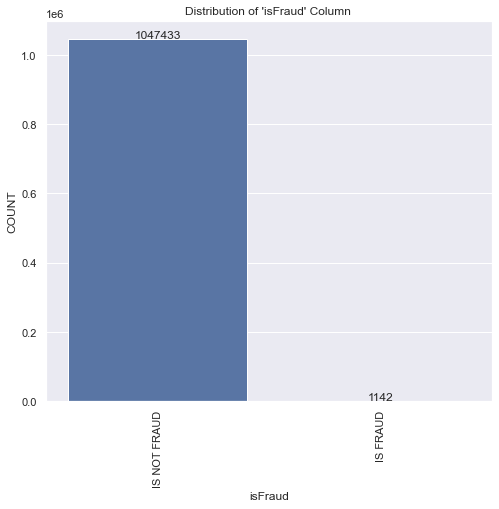

In [17]:
# Checking Distribution of Data set by Columns
# Looking at 'isFraud' Distribution
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='isFraud', data=bank_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of 'isFraud' Column ")
plt.ylabel('COUNT')

In [18]:
bank_data.groupby('type')['type'].count()

type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: type, dtype: int64

In [19]:
bank_data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [20]:
type_percentage = (bank_data['type'].value_counts()/bank_data.shape[0]*100).round(2)
type_percentage

CASH_OUT    35.63
PAYMENT     33.75
CASH_IN     21.66
TRANSFER     8.27
DEBIT        0.68
Name: type, dtype: float64

Text(0, 0.5, 'COUNT')

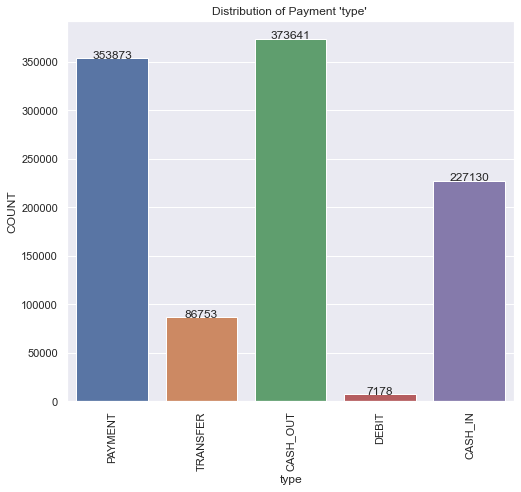

In [21]:
# Checking Distribution of Data set by Columns
# Looking at 'type' Distribution
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='type', data=bank_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Distribution of Payment 'type' ")
plt.ylabel('COUNT')

In [22]:
# columns selection 
Continuous_variables  = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
bank_data[Continuous_variables].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07


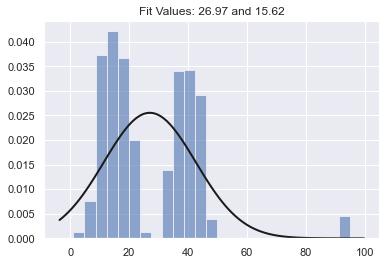

In [23]:
# mean and standard deviation('step')
mean, std = norm.fit(bank_data['step']) 
  
# Plot the histogram.
plt.hist(bank_data['step'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title )
  
plt.show()

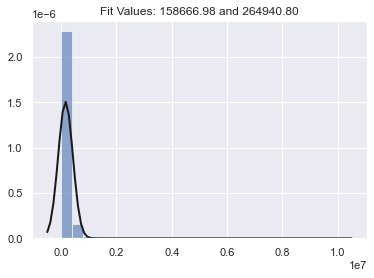

In [24]:
# mean and standard deviation('amount')
mean, std = norm.fit(bank_data['amount']) 
  
# Plot the histogram.
plt.hist(bank_data['amount'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title )
  
plt.show()

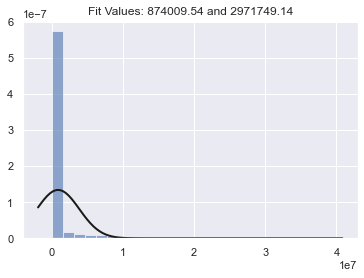

In [25]:
# mean and standard deviation('oldbalanceOrg')
mean, std = norm.fit(bank_data['oldbalanceOrg']) 
  
# Plot the histogram.
plt.hist(bank_data['oldbalanceOrg'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
  
plt.show()

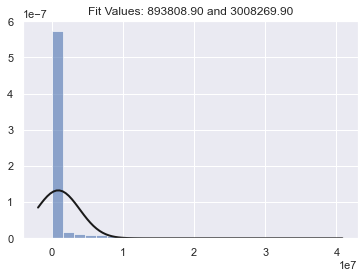

In [26]:
# mean and standard deviation('newbalanceOrig')
mean, std = norm.fit(bank_data['newbalanceOrig']) 
  
# Plot the histogram.
plt.hist(bank_data['newbalanceOrig'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
  
plt.show()

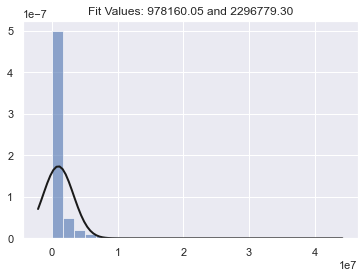

In [27]:
# mean and standard deviation('oldbalanceDest')
mean, std = norm.fit(bank_data['oldbalanceDest']) 
  
# Plot the histogram.
plt.hist(bank_data['oldbalanceDest'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
  
plt.show()

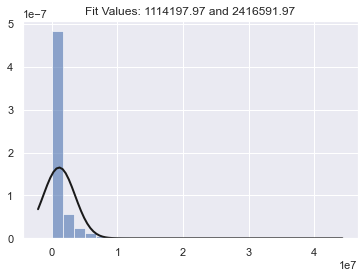

In [28]:
# mean and standard deviation('oldbalanceDest')
mean, std = norm.fit(bank_data['newbalanceDest']) 
  
# Plot the histogram.
plt.hist(bank_data['newbalanceDest'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
  
plt.show()

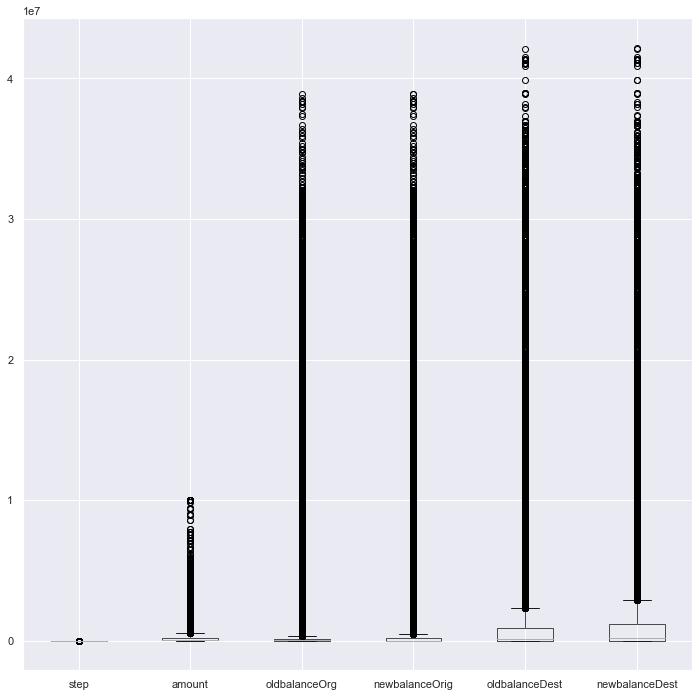

In [29]:
# Boxplot of continuous variables
plt.figure(figsize = (12, 12))
bank_data.boxplot(column= ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
plt.show()

In [30]:
#bivariate analysis cells
# Crosstab Display of Online transaction type by Fraudulent transaction

fraud_type_pivot = pd.crosstab(bank_data.type, bank_data.isFraud ,normalize='index')
display(fraud_type_pivot)

isFraud,IS FRAUD,IS NOT FRAUD
type,,
CASH_IN,0.000000,1.000000
CASH_OUT,0.001547,0.998453
DEBIT,0.000000,1.000000
PAYMENT,0.000000,1.000000
TRANSFER,0.006501,0.993499


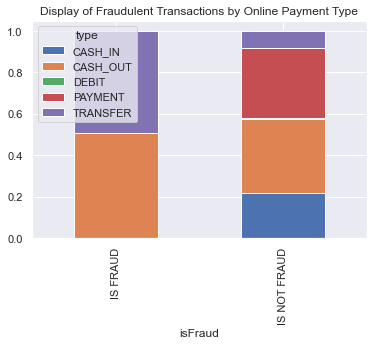

In [31]:
# Crosstab Display of Online transaction type by Fraudulent transaction

# Graphical display of fraudulent transactions by online transaction type
fraud_type_pivot = pd.crosstab(bank_data.isFraud, bank_data.type ,normalize='index')

#plot the data
fraud_type_pivot.plot.bar(stacked=True)

plt.title('Display of Fraudulent Transactions by Online Payment Type')
plt.show()

Text(0, 0.5, 'COUNT')

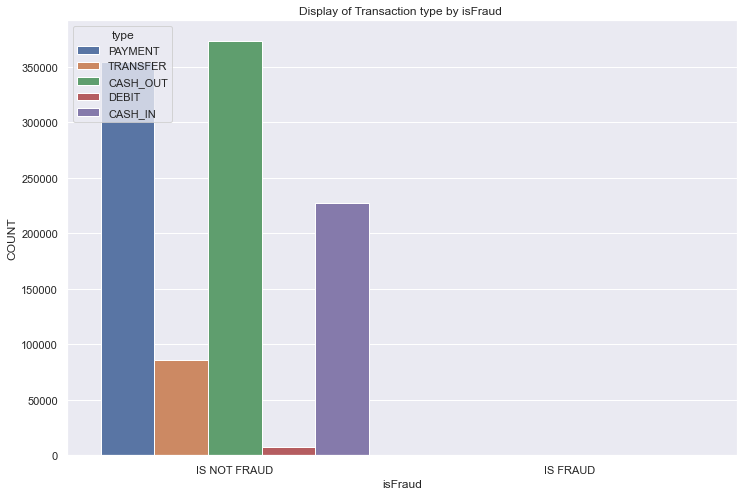

In [32]:
# Display of Transactions based on whether 'isFraud' or notFraud and Payment 'type' 
plt.figure(figsize=(12,8))
plt.title('Display of Transaction type by isFraud ')
sns.countplot(x='isFraud', data=bank_data, hue='type')
plt.xlabel('isFraud')
plt.ylabel('COUNT')

In [33]:
#multivariate analysis cells
# Display of Subscription Status by Education and Marital
#sns.catplot(col='isFraud', x='nameOrig', hue='type', data=bank_data, kind='count')

# MODELLING

 FEATURE ENGINEERING AND ENCODING

In [36]:
# Data set overview
bank_data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,IS NOT FRAUD
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,IS NOT FRAUD


In [37]:
# Import LabelEncoder libraries
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
# Encode the target column('isFraud')

# IS FRAUD = 1, IS NOT FRAUD = 0
#bank_data['isFraud'] = le.fit_transform(bank_data['isFraud'])
#bank_data.head(20)

def isFraud2(z):
    if z == 'IS NOT FRAUD':
        return 0
    else:
        return 1
    
bank_data['isFraud'] = bank_data['isFraud'].apply(isFraud2)
bank_data.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [40]:
# Carry out One-Hot-Encoding on other categorical features to numerical 

#1. select categorical variables

bank_data_categorical = ['type',]

#2. We use pd.get_dummies() for one hot encoding

categorical_dummies = pd.get_dummies(bank_data[bank_data_categorical])

#view our new categories 
categorical_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [41]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names


bank_data = pd.concat([bank_data, categorical_dummies], axis=1)

#View the new data columns
print(bank_data.shape)
bank_data.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [42]:
#remove the initial categorical columns now that we have encoded them and also other irrelevant columns
#use the list called irrelevant_categories do delete all the irrelevant  selected columns at once.

irrelevant_categories = ['type', 'nameOrig', 'nameDest']
bank_data = bank_data.drop(irrelevant_categories,axis=1)

print(bank_data.shape)
bank_data.head()

(1048575, 12)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


# Select Features

In [43]:
# Select Our target features 'isFraud' column and assign it to y
y = bank_data['isFraud']

In [44]:
# Assign our training data to X

X = bank_data.drop('isFraud', axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [45]:
print(X.head())
print(y.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0             0.0             0              0           0             1   
1             0.0             0              0           0             1   
2             0.0             0              0           0             0   
3             0.0             0              1           0             0   
4             0.0             0              0           0             1   

   type_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0  
0    0
1    0
2    1

# Train Test Splits

In [46]:
#use train_test_split to divide the dataset into train and test datasets
#from sklearn.model_selection import train_test_split

In [47]:
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [48]:
print('\n',X_train.shape)
print('\n',X_test.shape)
print('\n',y_train.shape)
print('\n',y_test.shape)


 (629145, 11)

 (419430, 11)

 (629145,)

 (419430,)


# Import ML Algorithms and initialize them

In [50]:
#import the libraries we will need
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [51]:
# Initializing DecisionTree
DTC_model = DecisionTreeClassifier()

In [52]:
# Initialize KNeighborsClassifier(KNN)
KNC_model = KNeighborsClassifier()

In [53]:
# Initialize RandomForestClassifier
RFC_model =  RandomForestClassifier()

In [54]:
# Initialize LogisticRegression
LR_model = LogisticRegression()

In [55]:
#Initialize Support Vector Machine - Classifier
SVMC_model = SVC()

In [56]:
#Train and Test the Model

In [57]:
# Fitting and Training with DecisionTreeClassifier()
DTC_model = DTC_model.fit(X_train, y_train)
DTC_preds = DTC_model.predict(X_test)

In [58]:
print("DecisionTree Accuracy is:", accuracy_score(DTC_preds,y_test))
print("DecisionTree Precision is:", precision_score(DTC_preds,y_test))
print("DecisionTree Recall is:", recall_score(DTC_preds,y_test))

DecisionTree Accuracy is: 0.9996089931573803
DecisionTree Precision is: 0.7985948477751756
DecisionTree Recall is: 0.8138424821002387


In [59]:
# Fitting and Training with KNeighborsClassifier(KNN)
KNC_model = KNC_model.fit(X_train, y_train)
KNC_preds = KNC_model.predict(X_test)

In [60]:
print("Accuracy", accuracy_score(KNC_preds,y_test))
print("Precision", precision_score(KNC_preds,y_test))
print("Recall", recall_score(KNC_preds,y_test))


Accuracy 0.9993658059747753
Precision 0.5433255269320844
Recall 0.7656765676567657


In [61]:
# Fitting and Training with RandomForestClassifier
RFC_model = RFC_model.fit(X_train, y_train)
RFC_preds = RFC_model.predict(X_test)

In [62]:
print("Accuracy", accuracy_score(RFC_preds,y_test))
print("Precision", precision_score(RFC_preds,y_test))
print("Recall", recall_score(RFC_preds,y_test))

Accuracy 0.9997591970054598
Precision 0.7775175644028103
Recall 0.9822485207100592


In [63]:
# Fitting and Training with LogisticRegression
LR_model = LR_model.fit(X_train, y_train)
LR_preds = LR_model.predict(X_test)

In [64]:
print("Accuracy", accuracy_score(LR_preds,y_test))
print("Precision", precision_score(LR_preds,y_test))
print("Recall", recall_score(LR_preds,y_test))

# Parameter values on the model split
print("Intercept = {0}".format(LR_model.intercept_))
print("Coefficients = {0}".format(LR_model.coef_.tolist()))

Accuracy 0.9989891042605441
Precision 0.3629976580796253
Recall 0.504885993485342
Intercept = [-0.0085747]
Coefficients = [[-0.2398044380140303, -0.00014174458428117855, 0.00015858061934973663, -0.00020402434811010053, 2.840825330540161e-06, -3.919313410065698e-06, -5.9751157260641715e-06, -0.0006040322737628021, -0.0001439643395892091, -0.007839591378002895, 1.8862085946432598e-05]]


In [65]:
# Fitting and Training with Support Vector Machine - Classifier
#SVMC_model = SVMC_model.fit(X_train, y_train)
#SVMC_preds = SVMC_model.predict(X_test)

In [66]:
#print("Accuracy", accuracy_score(SVMC_preds,y_test))
#print("Precision", precision_score(SVMC_preds,y_test))
#print("Recall", recall_score(SVMC_preds,y_test))

# PRINT REPORT SUMMARY

In [68]:
#create list of your model names
models = [DTC_model,KNC_model,RFC_model,LR_model,SVMC_model]

In [69]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    #print(classification_report(prediction,y_valid)) #use this later

In [70]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For DecisionTreeClassifier, Accuracy score is 0.999592303840927 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419008
           1       0.79      0.80      0.80       422

    accuracy                           1.00    419430
   macro avg       0.90      0.90      0.90    419430
weighted avg       1.00      1.00      1.00    419430


For KNeighborsClassifier, Accuracy score is 0.9993658059747753 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419127
           1       0.54      0.77      0.64       303

    accuracy                           1.00    419430
   macro avg       0.77      0.88      0.82    419430
weighted avg       1.00      1.00      1.00    419430


For RandomForestClassifier, Accuracy score is 0.9997639653815893 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419090
           1       0.78      0.98   

# Our Findings 

- We can deduce from our analysis above that model that has produced the best metrics is RandomForestClassifier model with the   highest Accuracy and Recall of 99% and 98% respectively
- There is need for us to also bear in mind that our Dataset has a problem of Class imbalance with about 99% of the Dataset       being biased infavour of 'ISNOTFRAUD' 

### Checking Feature Importance To Best Model


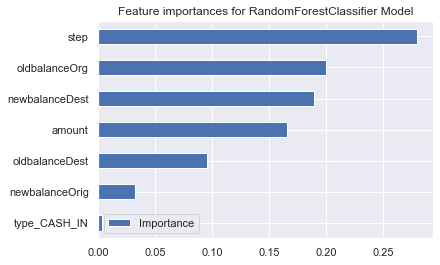

In [72]:
#get feature importances
RFC_importances = pd.DataFrame(data = RFC_model.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RFC_importances[:7].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for RandomForestClassifier Model')
plt.show()

### Training our Model with Important Features

In [73]:
# Select top 10 important Features
RFC_importances[:7].sort_values(by='Importance').index.values

array(['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest', 'amount',
       'newbalanceDest', 'oldbalanceOrg', 'step'], dtype=object)

In [74]:
#create a new X train with only 7 features
X_train2 = X_train[['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'amount', 'oldbalanceOrg', 'step']]
X_train2.head()

,type_CASH_IN,newbalanceOrig,oldbalanceDest,newbalanceDest,amount,oldbalanceOrg,step
80981,0,55646.43,0.00,0.00,14041.57,69688.00,10
351223,0,0.00,537554.93,1221908.02,521310.05,10384.00,17
371883,1,228783.98,1337834.04,1092284.69,228783.98,0.00,17
245316,0,49960.12,0.00,0.00,8237.12,58197.24,14
316939,0,0.00,0.00,0.00,16361.16,0.00,16


In [75]:
#create a new X_valid with only 10 features so we can predict on them
X_test2 = X_test[['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'amount', 'oldbalanceOrg', 'step']]

In [76]:
#train and predict
RFC_model.fit(X_train2,y_train)
pred2 = RFC_model.predict(X_test2)

# Print result based on 10 important features

print("Accuracy", accuracy_score(pred2,y_test))
print("Precision", precision_score(pred2,y_test))
print("Recall", recall_score(pred2,y_test))

Accuracy 0.9996423717902868
Precision 0.6697892271662763
Recall 0.9694915254237289


### Cross Validation Evaluation

In [77]:
# Evaluate our models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [78]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f' % (mean(scores)))
    print(scores)
    print(model.__class__.__name__, 'Accuracy: %.3f' % (mean(scores)))

In [ ]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X,y)

[0.99956131 0.99951363 0.99967575 0.99965668 0.99954224 0.99959945
 0.99958038 0.99961853 0.99952316 0.9996376 ]
DecisionTreeClassifier Accuracy: 1.000
[0.9994278  0.99939919 0.99939919 0.9994278  0.9993515  0.99933242
 0.99938011 0.99937057 0.99919891 0.99946594]
KNeighborsClassifier Accuracy: 0.999
[0.99973297 0.99975205 0.9998188  0.99980927 0.99977112 0.99974251
 0.99979019 0.99978065 0.99970436 0.99976158]
RandomForestClassifier Accuracy: 1.000
[0.99903679 0.99893189 0.99890328 0.99894143 0.99910355 0.99899864
 0.99896049 0.99893188 0.99879836 0.99912261]
LogisticRegression Accuracy: 0.999


### Build Confusion Matrix

In [ ]:
print(confusion_matrix(DTC_preds, y_test))
print(confusion_matrix(KNC_preds, y_test))
print(confusion_matrix(RFC_preds, y_test))
print(confusion_matrix(LR_preds, y_test))
print(confusion_matrix(SVMC_preds, y_test))

In [ ]:
c_matrix = confusion_matrix(DTC_preds, y_test)
# Generating confusion matrix with percentages
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True,
          fmt='.2%', cmap='Greens')

ax.set_title('Confusion matrix for Decision Tree');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels- List must be in alphabetical order
ax.xaxis.set_ticklabels(['Did not Default', 'Defaulted'])
ax.yaxis.set_ticklabels(['Did not Default', 'Defaulted'])

## Display the Visualization of the Confusion Matrix
plt.show()